## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
bank_dataset = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')
bank_dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
bank_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
print(f"\nShape: {bank_dataset.shape}")


Shape: (41188, 21)


In [12]:
bank_dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [13]:
bank_dataset['y'] = bank_dataset['y'].apply(lambda x: 0 if x == 'no' else 1)
bank_target = bank_dataset['y']
bank_target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [15]:
bank_client = bank_dataset.loc[:, ["age", "job", "marital", "education", "default", "housing", "loan"]]
for cliet_var in bank_client:
    print(bank_client[cliet_var].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

98
17
0


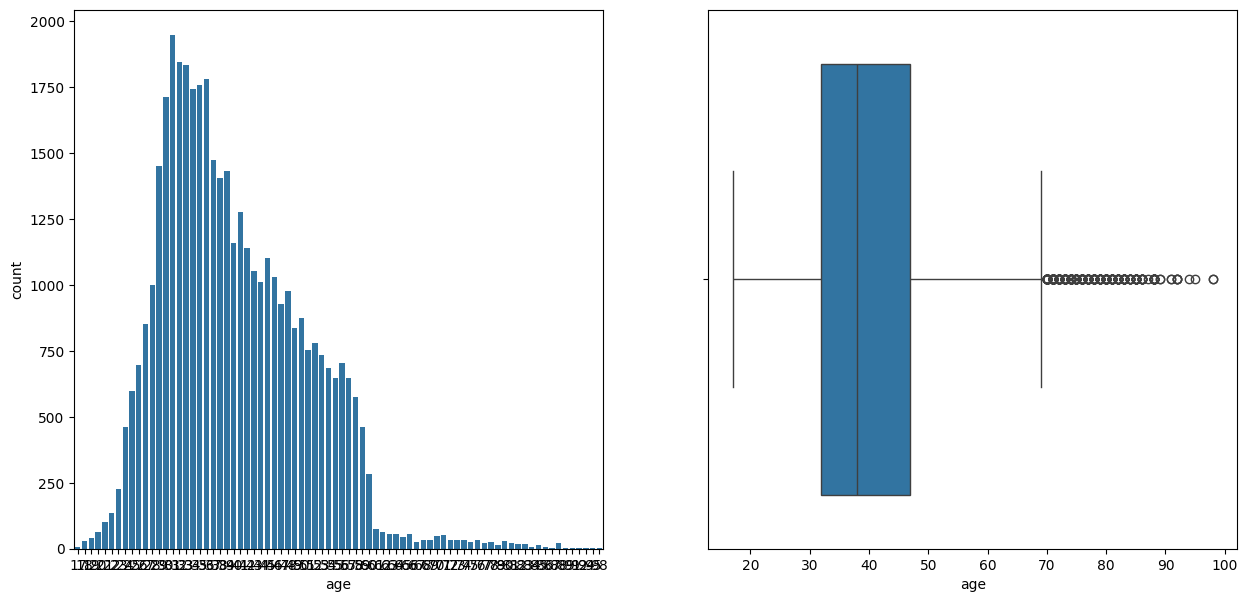

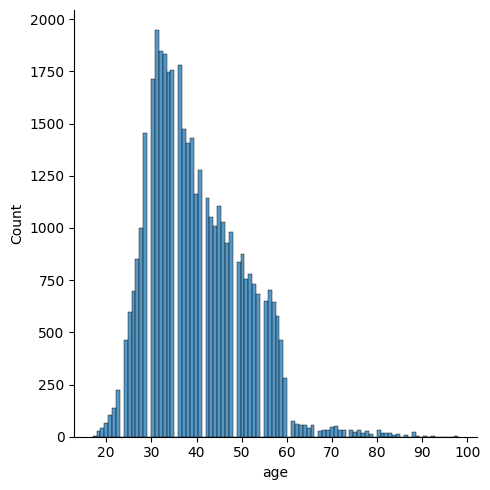

In [17]:
_, ax = plt.subplots(1,2, figsize=(15, 7))
sns.countplot(bank_dataset, x="age", ax=ax[0])
sns.boxplot(bank_dataset, x="age", ax=ax[1])
sns.displot(bank_dataset, x="age")

print(bank_dataset.age.max())
print(bank_dataset.age.min())
print(bank_dataset.age.isna().sum())

**Висновки з 1-4 завдання (детальні)**

1. Завантажили датасет і виконали аналіз, оцінивши його розмірність, типи даних та перевірили на нульові значень. 
2. Визначили цільову змінну y, яка є категоріальною і перетворили в числовий формат: 0 - no, 1 - yes.
3. Визначили атрибути які пов’язані з клієнтами банку, такі як "age", "job", "marital", "education", "default", "housing", "loan" в окремий датасет. 
4.  Віковий розподіл нагадує нормальний розподіл, з важчим правим хвостом. Більшість клієнтів знаходяться у віковому діапазоні 25-45 років, та встановили мінімальне та максимальне значення у 17 та 98 років.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [18]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = low_percentile
    up_lim = high_percentile
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [19]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: 10

 Upper bound: 90

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
27826,95,retired,divorced,basic.6y,no,no,no
38022,91,retired,married,university.degree,no,yes,yes
38032,91,retired,married,university.degree,no,no,yes
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no
38921,94,retired,married,basic.9y,no,no,no
39655,92,retired,married,unknown,no,yes,no
39734,92,retired,divorced,unknown,unknown,no,no
40450,92,retired,married,unknown,no,no,yes
40469,92,retired,married,unknown,no,no,yes


**Висновки з завдання 5 (детальні)**

1.  Перевірка атрибуту `Age` на викиди дала такі висновки:функція встановлює нижню та верхню межі для виявлення викидів, які становлять 10 та 90 років 

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

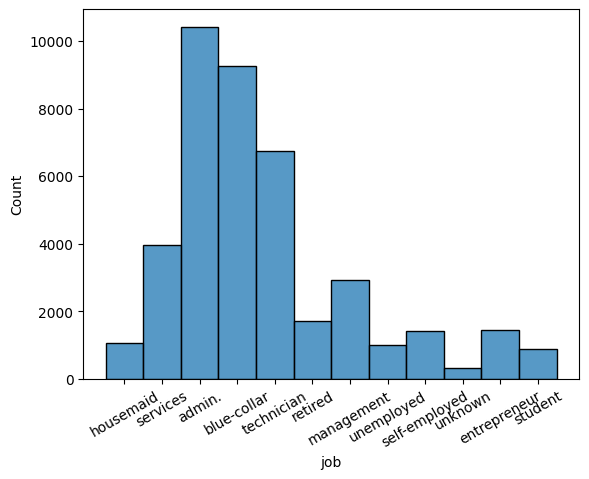

In [21]:
sns.histplot(bank_dataset, x="job")
plt.xticks(rotation=30)
plt.show()

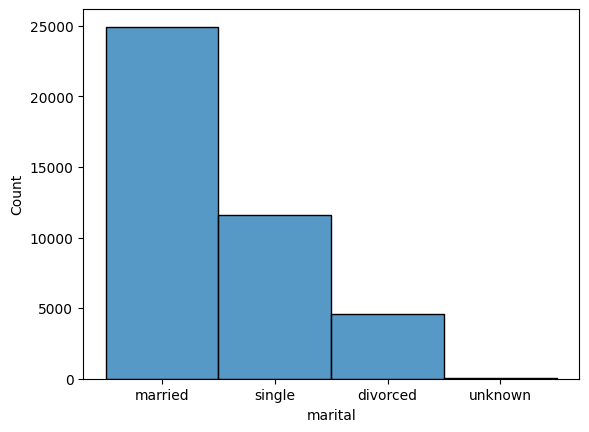

In [22]:
sns.histplot(bank_dataset, x="marital")
plt.show()

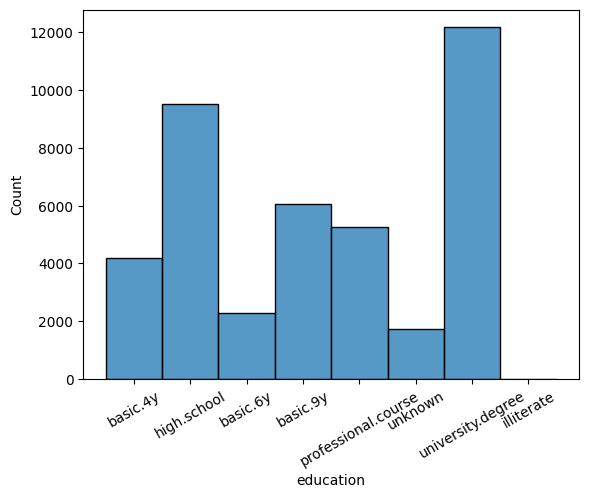

In [23]:
sns.histplot(bank_dataset, x="education")
plt.xticks(rotation=30)
plt.show()

**Висновки з завдання 6 (детальні)**

1.  Графік робочих місць показує, що найпопулярнішими професіями серед клієнтів є admin, blue-collar та technician.
2.  Графік з Сімейним станом показує, що більшість клієнтів є одружені.
3.  Графік з Освітою показує, що більшість клієнтів мають вищу освіту або закінчену старшу школу.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

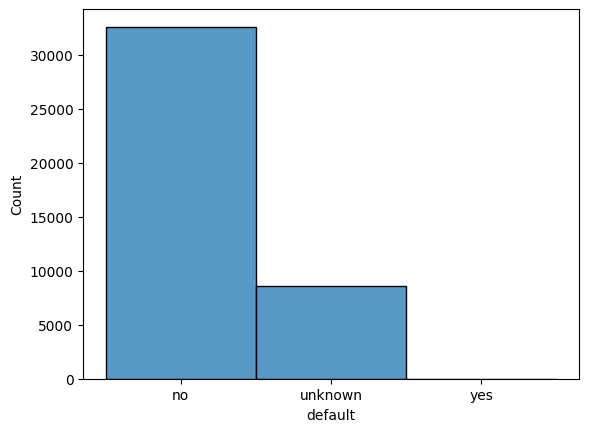

In [24]:
sns.histplot(bank_dataset, x="default")
plt.show()

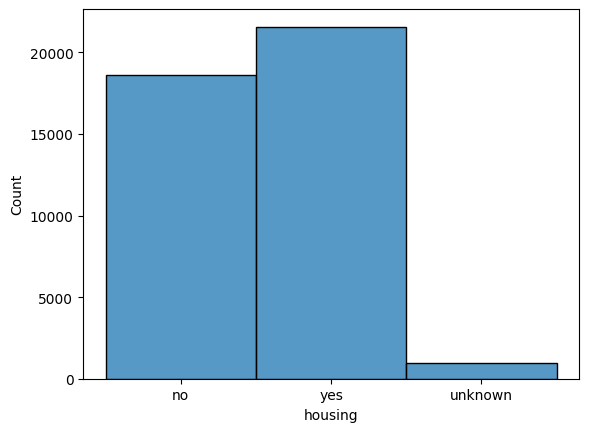

In [25]:
sns.histplot(bank_dataset, x="housing")
plt.show()

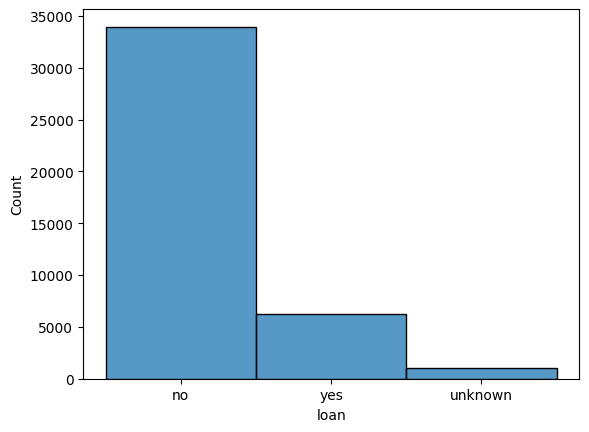

In [26]:
sns.histplot(bank_dataset, x="loan")
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [27]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
      
    return df

In [29]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [30]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  print(pd.qcut(dataframe[age_col], q=4))
  dataframe["age_category"] = pd.qcut(dataframe[age_col], q=4, labels=[0, 1, 2, 3])
          
  return dataframe

In [31]:
bank_client = encode_age(bank_client, 'age')

0        (47.0, 98.0]
1        (47.0, 98.0]
2        (32.0, 38.0]
3        (38.0, 47.0]
4        (47.0, 98.0]
             ...     
41183    (47.0, 98.0]
41184    (38.0, 47.0]
41185    (47.0, 98.0]
41186    (38.0, 47.0]
41187    (47.0, 98.0]
Name: age, Length: 41188, dtype: category
Categories (4, interval[float64, right]): [(16.999, 32.0] < (32.0, 38.0] < (38.0, 47.0] < (47.0, 98.0]]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Отже змінну Age ми розбили на 4 інтервали: 16-32; 32-38; 38-47; 47-98.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [32]:
bank_relat = bank_dataset.loc[:, ['contact', 'month', 'day_of_week', 'duration']]
bank_relat.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [33]:
print(bank_relat.contact.unique())
print(bank_relat.month.unique())
print(bank_relat.day_of_week.unique())

['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



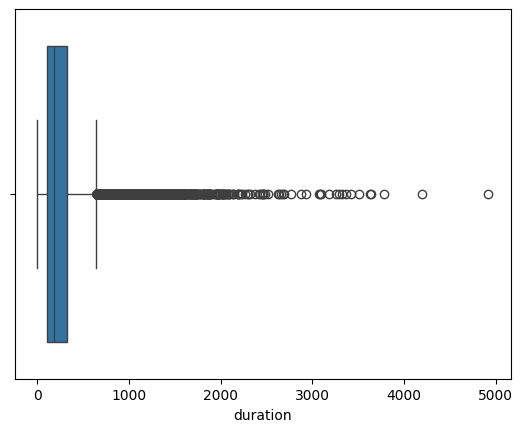

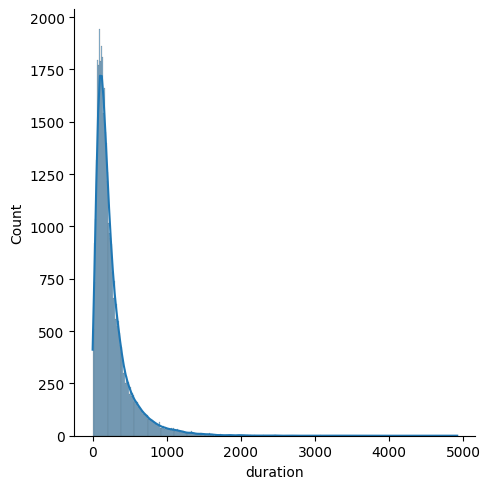

In [34]:
sns.boxplot(bank_relat, x="duration")
sns.displot(bank_relat, x="duration", kde=True)

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [35]:
bank_relat = encode_categorical_columns(bank_relat, ["contact", "month", "day_of_week"])
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
41183,0,7,0,334
41184,0,7,0,383
41185,0,7,0,189
41186,0,7,0,442


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [85]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column
    
    df: pd.DataFrame to encode
    duration_col: duration col to encode 
    """
    bins = [-np.inf, 0, 500, 1000, np.inf]  
    labels = [0, 1, 2, 3]  
    dataframe[duration_col] = pd.cut(dataframe[duration_col], bins=bins, labels=labels, duplicates='drop')

    return dataframe

In [86]:
bank_relat = encode_duration(bank_relat, 'duration')
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,1
1,1,6,1,0
2,1,6,1,1
3,1,6,1,0
4,1,6,1,1
...,...,...,...,...
41183,0,7,0,1
41184,0,7,0,1
41185,0,7,0,1
41186,0,7,0,1


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [87]:
bank_socec = bank_dataset.loc[:, ['emp.var.rate', "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
bank_socec

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [88]:
bank_other = bank_dataset.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [89]:
bank_other['poutcome'] = bank_other['poutcome'].apply(lambda x: 0 if x == "success" else 1 if x == "failure" else 2)
bank_other['poutcome']

0        2
1        2
2        2
3        2
4        2
        ..
41183    2
41184    2
41185    2
41186    2
41187    1
Name: poutcome, Length: 41188, dtype: int64

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [90]:
bank_final = pd.concat([bank_client, bank_other, bank_relat, bank_socec], axis=1)
bank_final

,age,job,marital,education,default,housing,loan,age_category,campaign,pdays,...,poutcome,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,3,1,999,...,2,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,3,1,999,...,2,1,6,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,1,999,...,2,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,2,1,999,...,2,1,6,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,3,1,999,...,2,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,3,1,999,...,2,0,7,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,2,1,999,...,2,0,7,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,3,2,999,...,2,0,7,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,2,1,999,...,2,0,7,0,1,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 19** Провести ділення вибірки

In [91]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle=True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [93]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [94]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [95]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [96]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7125  154]
 [ 663  296]]
90.0


## k-NN

k=1 86.24 (+/- 0.56)
k=2 89.42 (+/- 0.52)
k=3 89.08 (+/- 0.44)
k=4 90.02 (+/- 0.56)
k=5 89.94 (+/- 0.52)
k=6 90.34 (+/- 0.50)
k=7 90.22 (+/- 0.56)
k=8 90.43 (+/- 0.57)
k=9 90.45 (+/- 0.64)
k=10 90.49 (+/- 0.58)
k=11 90.48 (+/- 0.61)
k=12 90.52 (+/- 0.63)
k=13 90.52 (+/- 0.67)
k=14 90.51 (+/- 0.63)
k=15 90.52 (+/- 0.65)
k=16 90.47 (+/- 0.62)
k=17 90.48 (+/- 0.59)
k=18 90.53 (+/- 0.61)
k=19 90.54 (+/- 0.64)
k=20 90.49 (+/- 0.64)
k=21 90.56 (+/- 0.65)
k=22 90.48 (+/- 0.70)
k=23 90.48 (+/- 0.65)
k=24 90.43 (+/- 0.66)
k=25 90.45 (+/- 0.69)
The optimal number of neighbors is 20 with 90.6%


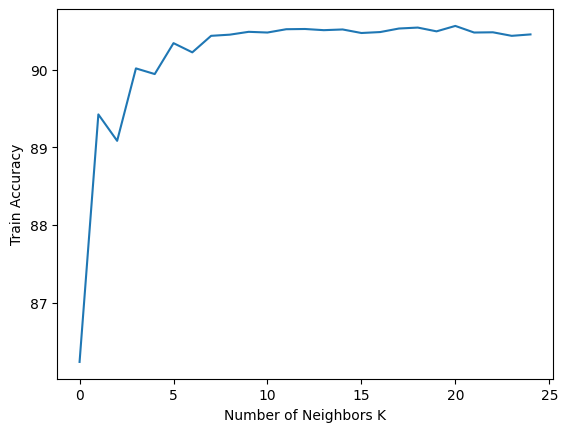

In [97]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [98]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7151  128]
 [ 692  267]]
90.0


## Логістична Регресія

In [99]:
models = pd.DataFrame({
                'Models': ["LogisticRegression" ,"k-NN"],
                'Score': [LOGCV*100, KNNCV*100]})


models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,90.119088
1,k-NN,90.082754


**Висновки по моделям (детальні)**

Коли завершили підготовку даних і поділу вибірки було проведено навчання двох моделей: логістичної регресії та k-NN. 

Результати навчання виявилися наступними:

Логістична регресія показала високу точність 90%, та k-NN модель також показала 90 %.

Логістична регресія: 90,39%
k-NN: 90,06% 
Дві моделі показали гарні результати, але логістична регресія була точнішою - 90,39% порівняно з k-NN, точність якої 90,06%.